In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

iowa_file_path = '../input/train.csv'

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## EDA

In [3]:
house_prices = pd.read_csv(iowa_file_path)

In [4]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
house_prices['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

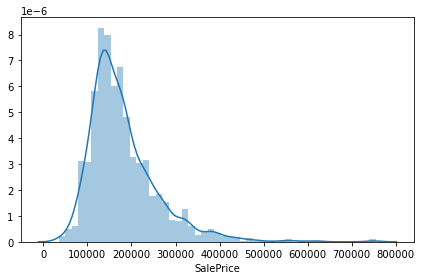

In [8]:
sns.distplot(house_prices['SalePrice'])
plt.tight_layout()

In [9]:
print('skewness: ', house_prices['SalePrice'].skew())
print('kurtosis: ', house_prices['SalePrice'].kurt())

skewness:  1.8828757597682129
kurtosis:  6.536281860064529


In [10]:
# medium
m_features = [
    'MSZoning', 'LotArea', 'Alley', 'Utilities', 'ExterQual', 'BsmtQual',
    'BsmtUnfSF', 'HeatingQC', 'Electrical', 'TotRmsAbvGrd', 'FireplaceQu',
    'GarageCars', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition', 'MSSubClass'
]

m_box = ['SaleType', 'SaleCondition', 'Fence', 'MiscFeature', 'GarageCars',
         'FireplaceQu', 'Electrical', 'HeatingQC', 'BsmtQual', 'ExterQual',
         'Alley', 'Utilities', 'MSZoning', 'MSSubClass'
]
m_scatter = ['TotRmsAbvGrd', 'BsmtUnfSF', 'LotArea', 'MiscVal']

In [11]:
# high
h_features = ['BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
              'TotalBsmtSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 
              'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageArea'
]

h_box = ['BldgType', 'HouseStyle', 'OverallQual', 'Functional', 'KitchenQual', 'FullBath']

h_scatter = ['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'BedroomAbvGr', 'KitchenAbvGr']

In [12]:
# Helper functions
def create_box(x, y='SalePrice', width=8, height=7, data=house_prices):
    fig, ax = plt.subplots(figsize=(width, height))
    ax.set_title(y + ' vs. ' + x)
    return sns.boxplot(x,y,data=data, ax=ax)

def create_scatter(x, y='SalePrice', width=8, height=7, data=house_prices):
    fig, ax = plt.subplots(figsize=(width, height))
    ax.set_title(y + ' vs. ' + x)
    return sns.scatterplot(x, y, data=data, palette='viridis', s=12, ax=ax)

## Analysis of features with expected influence on SalePrice

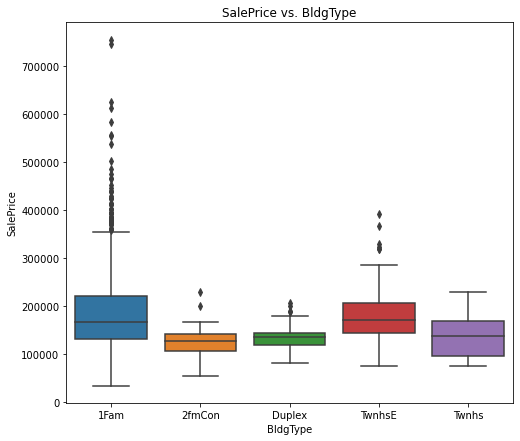

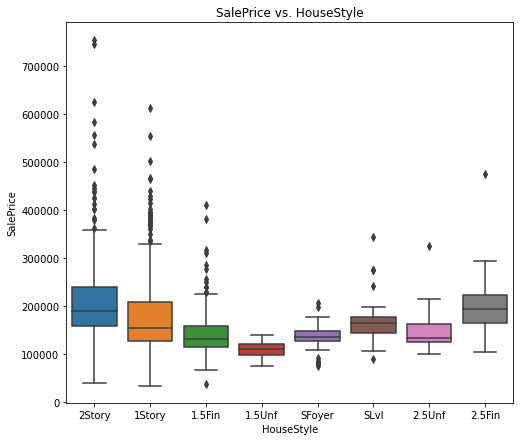

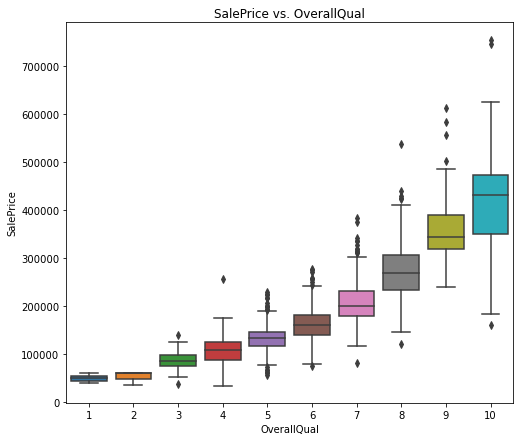

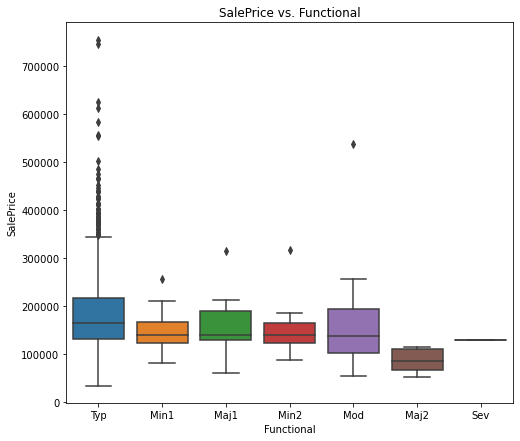

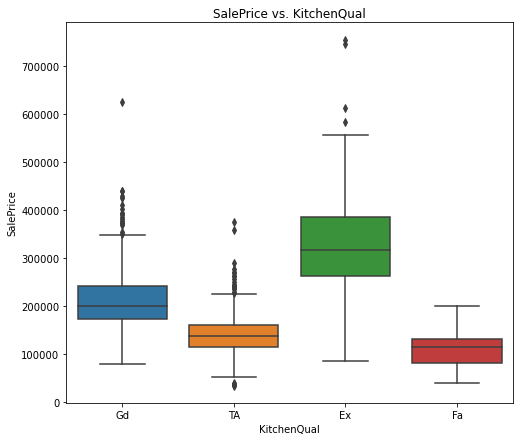

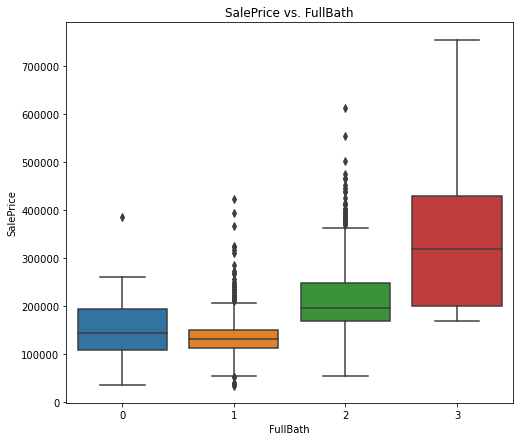

In [13]:
for category in h_box:
    create_box(category)

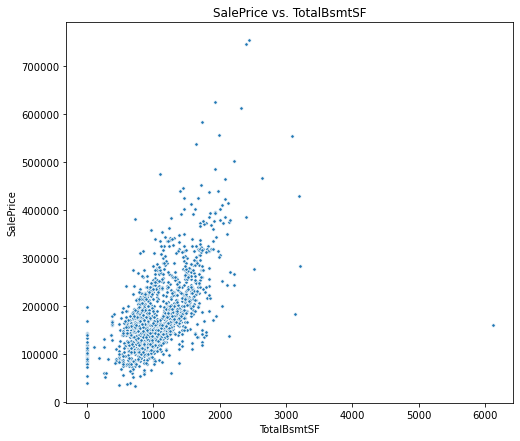

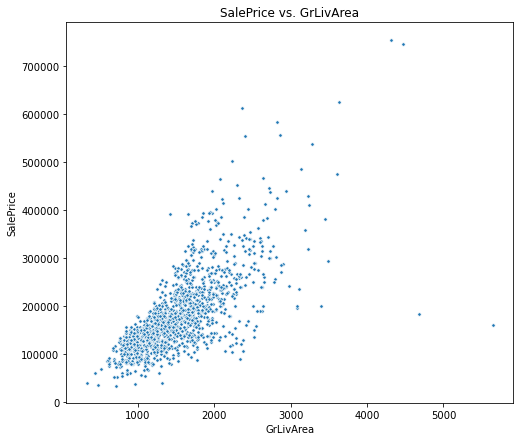

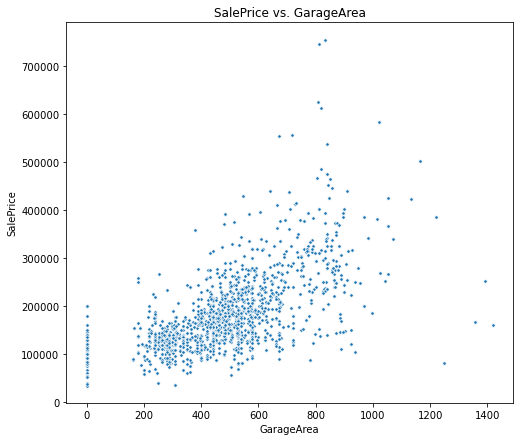

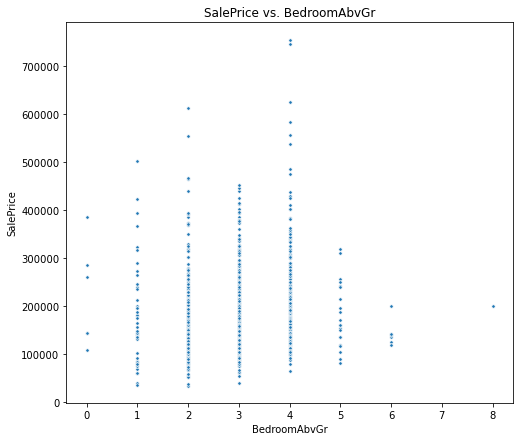

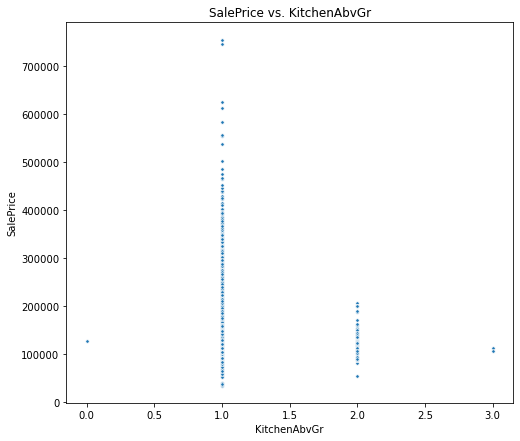

In [14]:
for num_data in h_scatter:
    create_scatter(num_data)

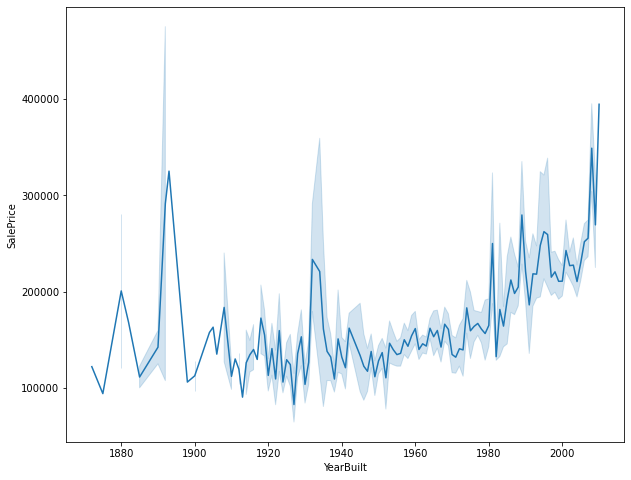

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot('YearBuilt', 'SalePrice', data=house_prices, ax=ax)

### Features with high influence

In [16]:
h_final = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'YearBuilt']

### Analysis of features with medium expected influence on SalePrice

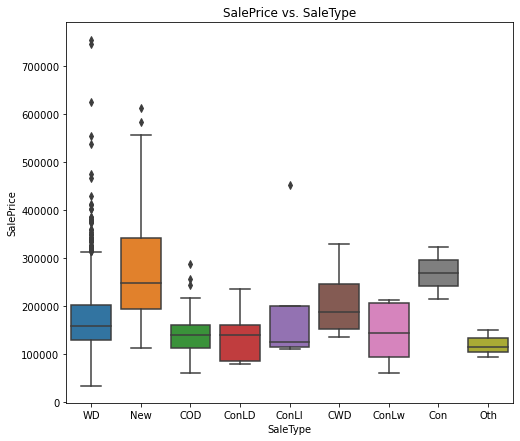

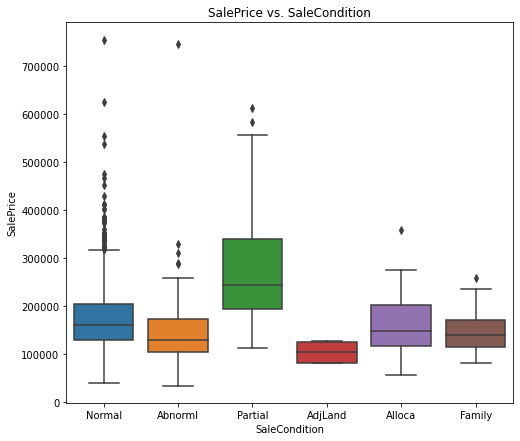

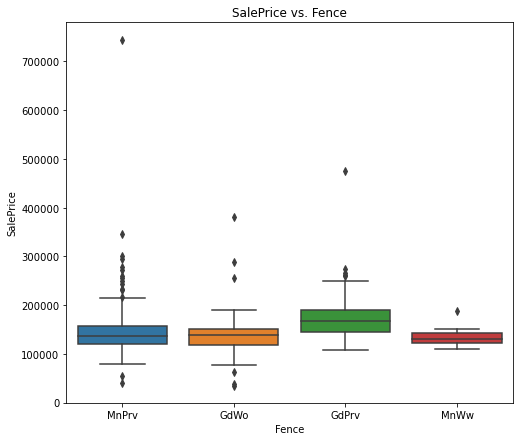

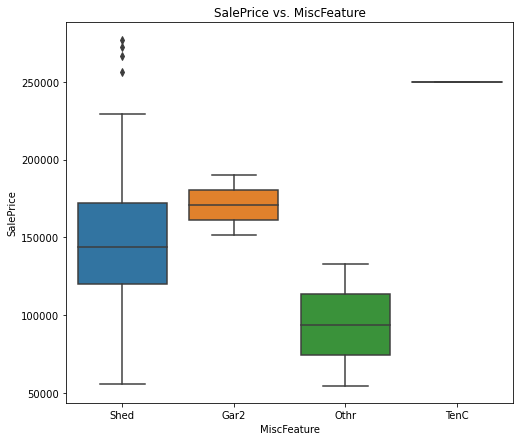

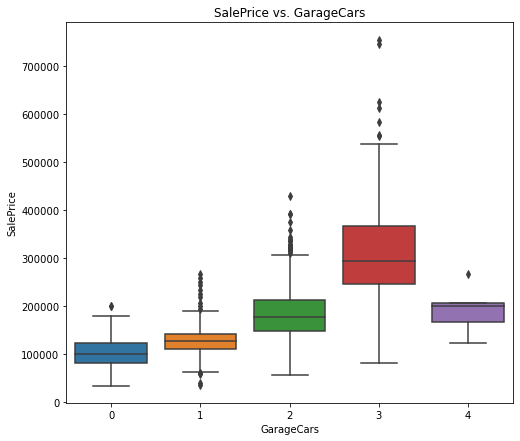

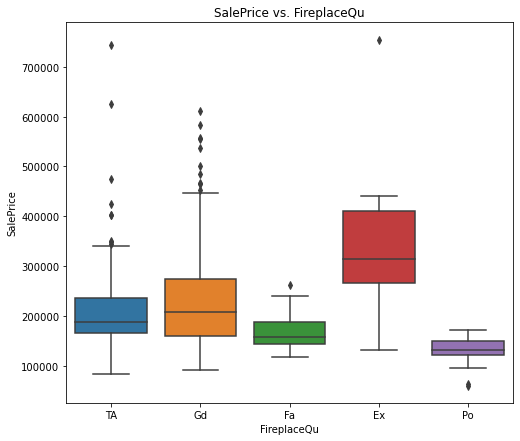

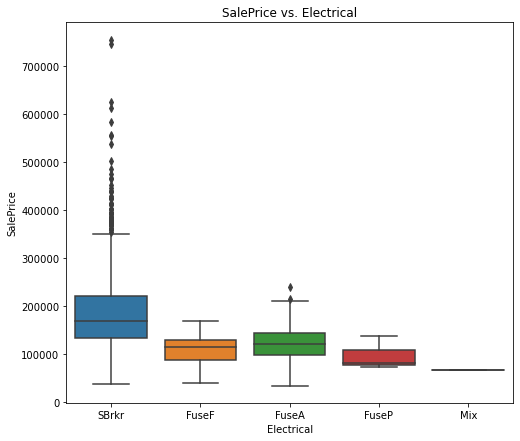

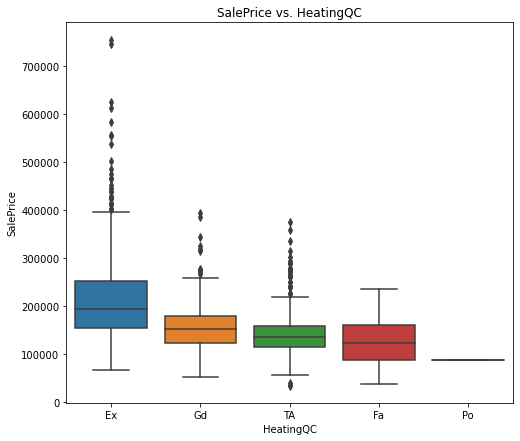

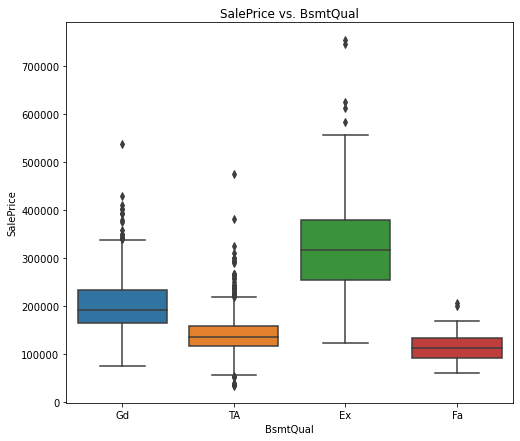

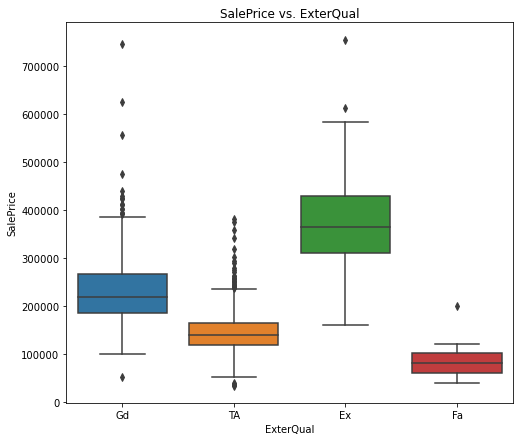

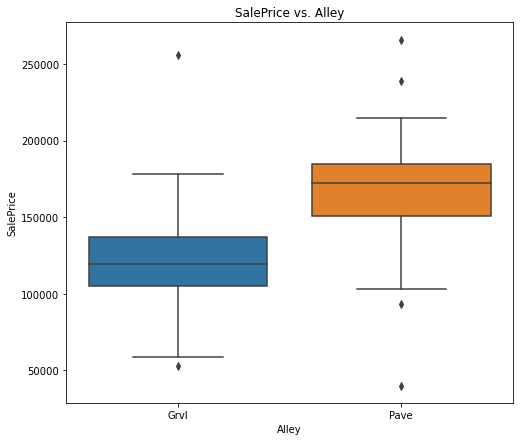

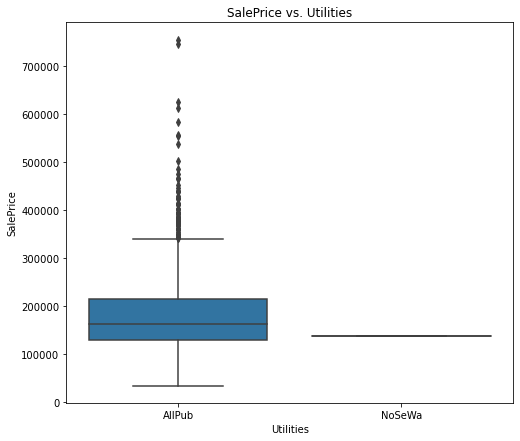

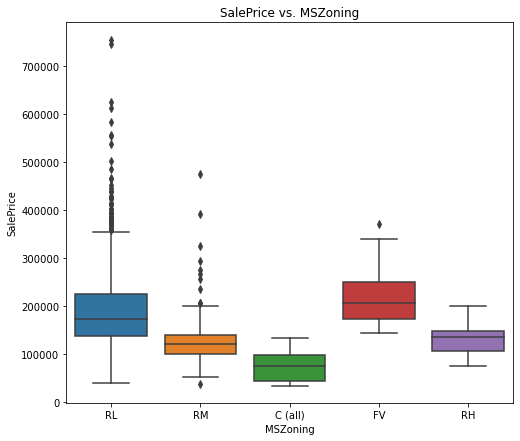

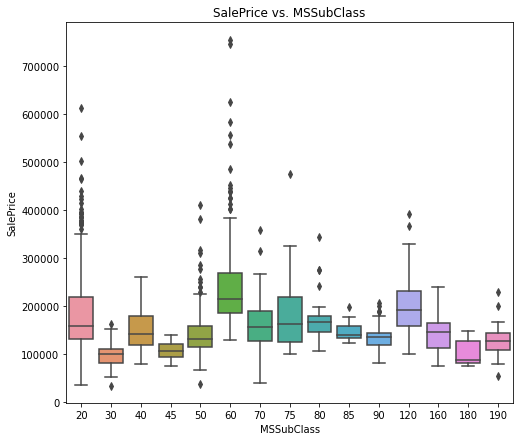

In [17]:
for category in m_box:
    create_box(category)

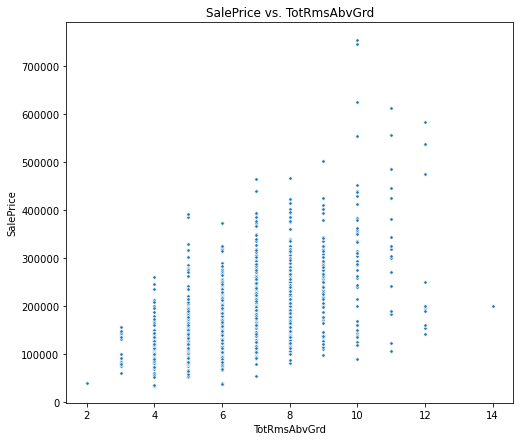

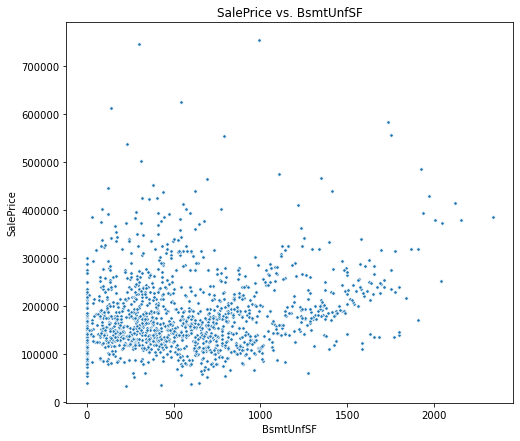

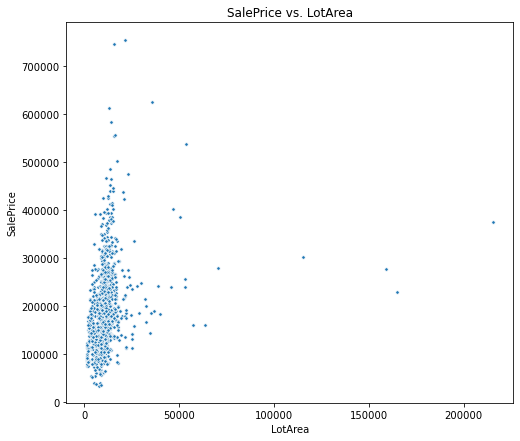

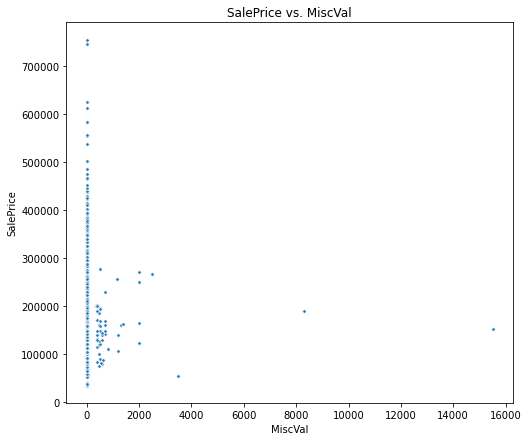

In [18]:
for num_data in m_scatter:
    create_scatter(num_data)

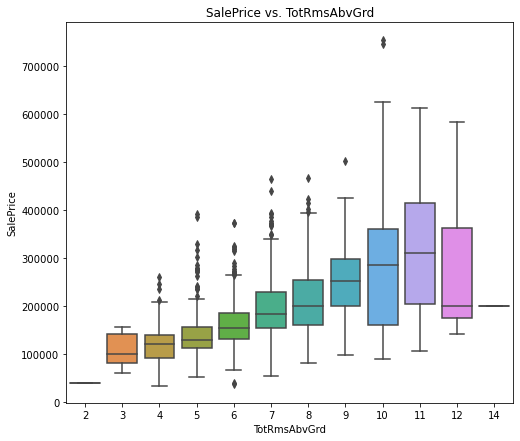

In [19]:
# Checking TotRmsAbvGrd
create_box('TotRmsAbvGrd')
# Not gonna add because with high correlation with GrLivArea

In [20]:
m_final = ['ExterQual', 'HeatingQC', 'GarageCars', 'LotArea', 'MSSubClass']

In [21]:
# Features without MSSubClass perform better on Lasso
features_final = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'ExterQual', 'HeatingQC', 'GarageCars', 'YearBuilt', 'LotArea']

### Correlation matrix

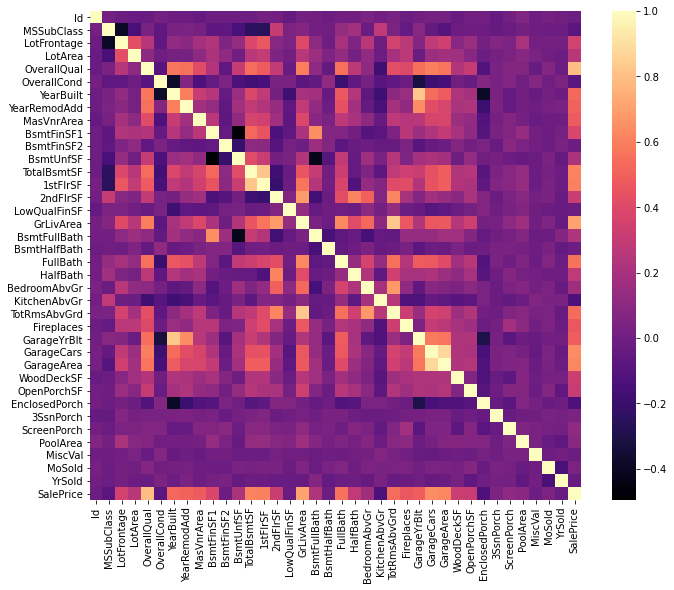

In [22]:
houses_correlation = house_prices.corr()
fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(houses_correlation, ax=ax, cmap='magma')

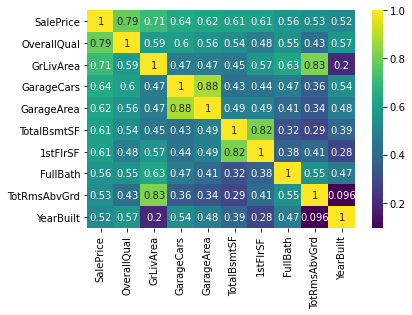

In [23]:
# Zoom on most correlated numeric features
k=10
cols = houses_correlation['SalePrice'].nlargest(k).index
correlations = np.corrcoef(house_prices[cols].values.T)
sns.heatmap(correlations, annot=True, yticklabels=cols, xticklabels=cols, cmap='viridis')

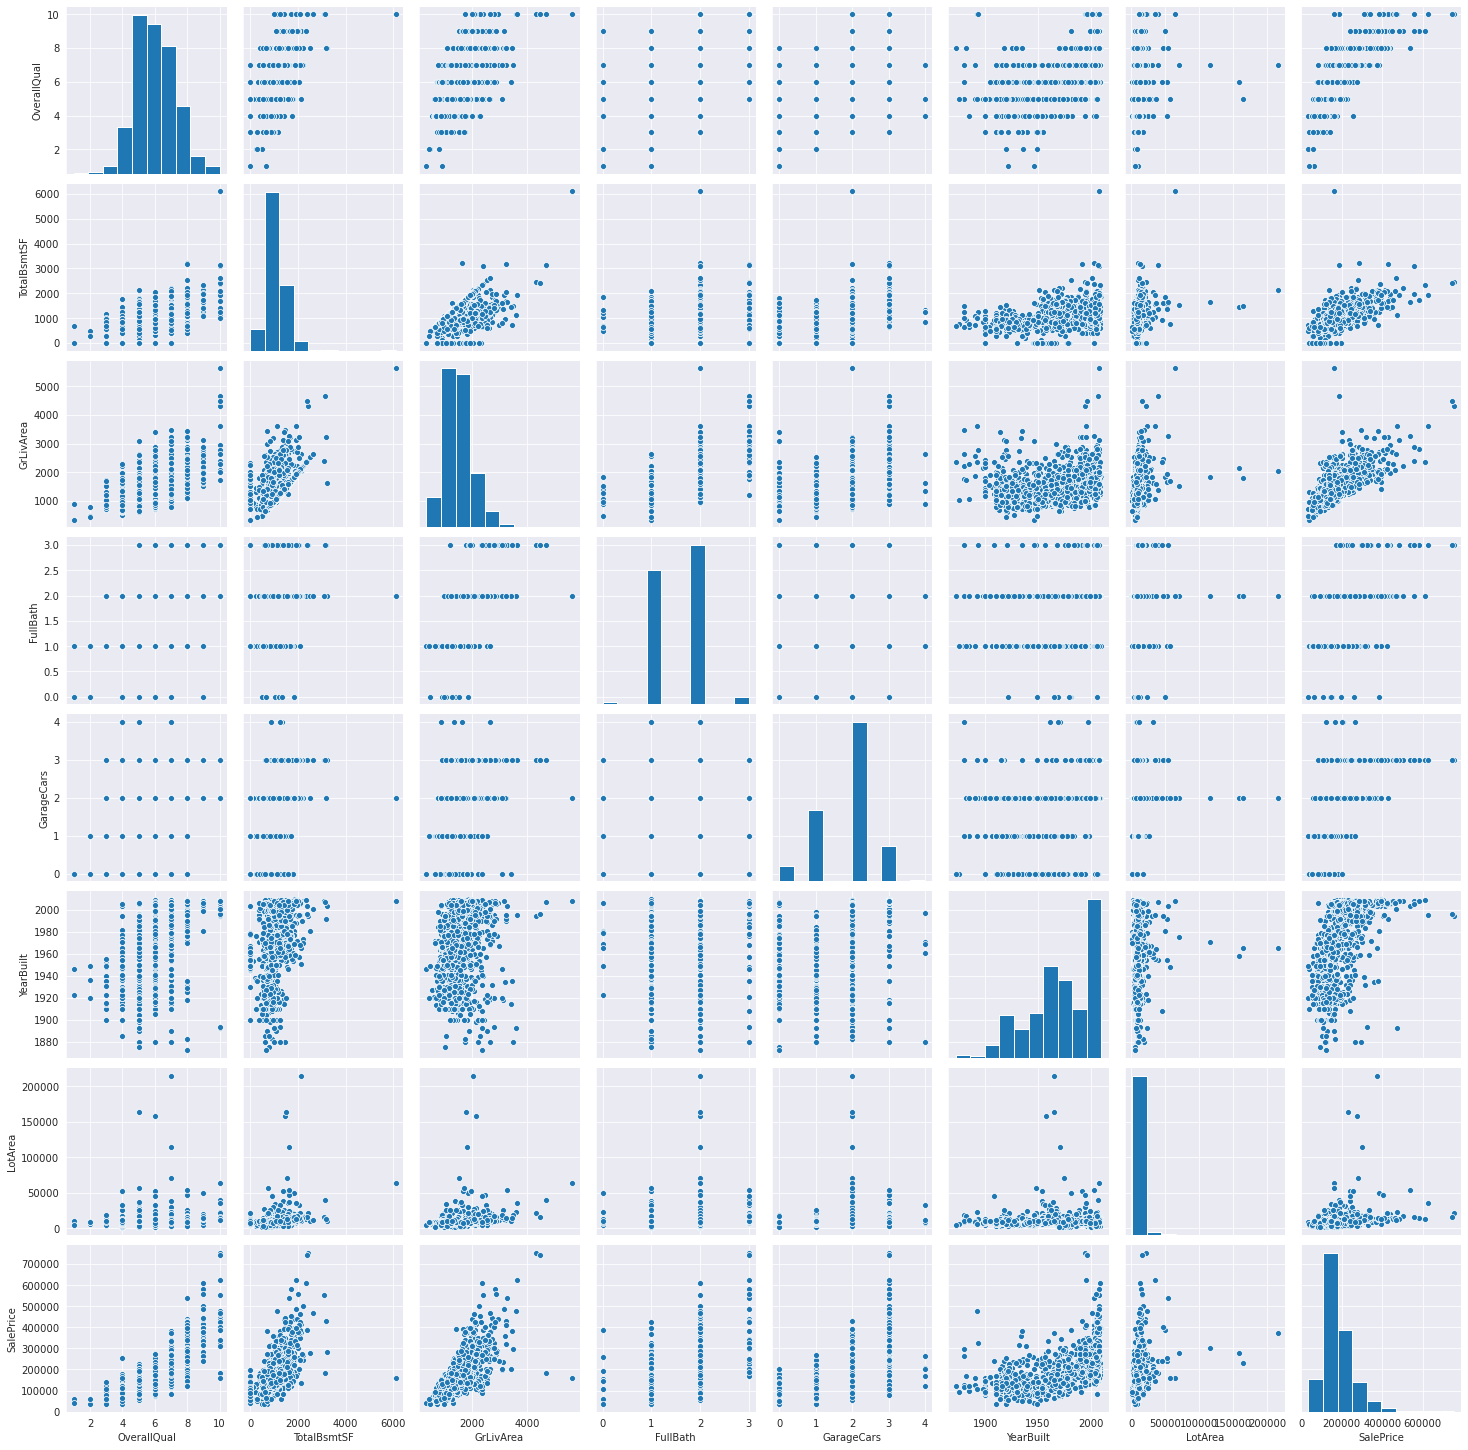

In [24]:
# Pairplot of choosed features
sns.set_style('darkgrid')
pp_feat = features_final.copy()
pp_feat.append('SalePrice')
sns.pairplot(house_prices[pp_feat])

## Additional EDA

In [25]:
def check_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    percentage = missing / len(df)
    missing_data = pd.concat([missing[missing>0], percentage], axis=1, join='inner', keys=['Nan values', 'Percentage'])
    return missing_data

## Numeric features

In [26]:
# Excluded reasons : 
#    1. Explored already
#    2. High multicorrelation with more important features
#    3. Low correlation with SalePrice
explored_nums = ['SalePrice', 'Id', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
                 'GarageArea', 'MSSubClass', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'GarageCars', 
                 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath', 
                 'GarageYrBlt', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalBsmtSF']

In [27]:
num_attributes = house_prices.select_dtypes(exclude='object').drop(explored_nums, axis=1).copy()
num_attributes

,LotFrontage,OverallCond,MasVnrArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,65.0,5,196.0,3,1,8,0,0,61,0
1,80.0,8,0.0,3,1,6,1,298,0,0
2,68.0,5,162.0,3,1,6,1,0,42,0
3,60.0,5,0.0,3,1,7,1,0,35,272
4,84.0,5,350.0,4,1,9,1,192,84,0
...,...,...,...,...,...,...,...,...,...,...
1455,62.0,5,0.0,3,1,7,1,0,40,0
1456,85.0,6,119.0,3,1,7,2,349,0,0
1457,66.0,9,0.0,4,1,9,2,0,60,0
1458,68.0,6,0.0,2,1,5,0,366,0,112


### Distributions

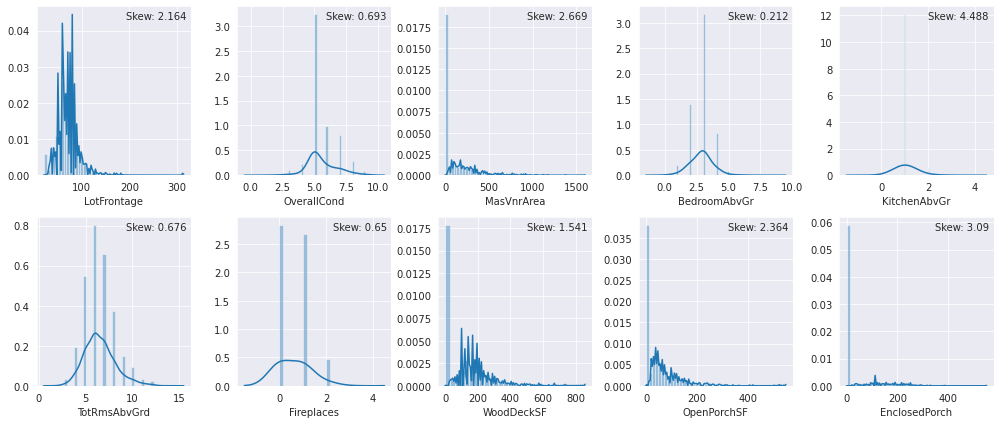

In [28]:
fig, axs = plt.subplots(2, 5, figsize=(14,6))
# Setting bandwidth becaues with given data and bw=0 cannot estimate density
for i, a in enumerate(num_attributes.columns):
    sns.distplot(num_attributes[a].dropna(), ax=axs[i//5][i%5], kde_kws={'bw': 0.5})
    # transform=axs[i//5][i%5].transAxes  using to transform in axes system 
    axs[i//5][i%5].text(x=0.97, y=0.97, s=f'Skew: {round(num_attributes[a].dropna().skew(), 3)}', transform=axs[i//5][i%5].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
    
plt.tight_layout()

### Bivariate analysis

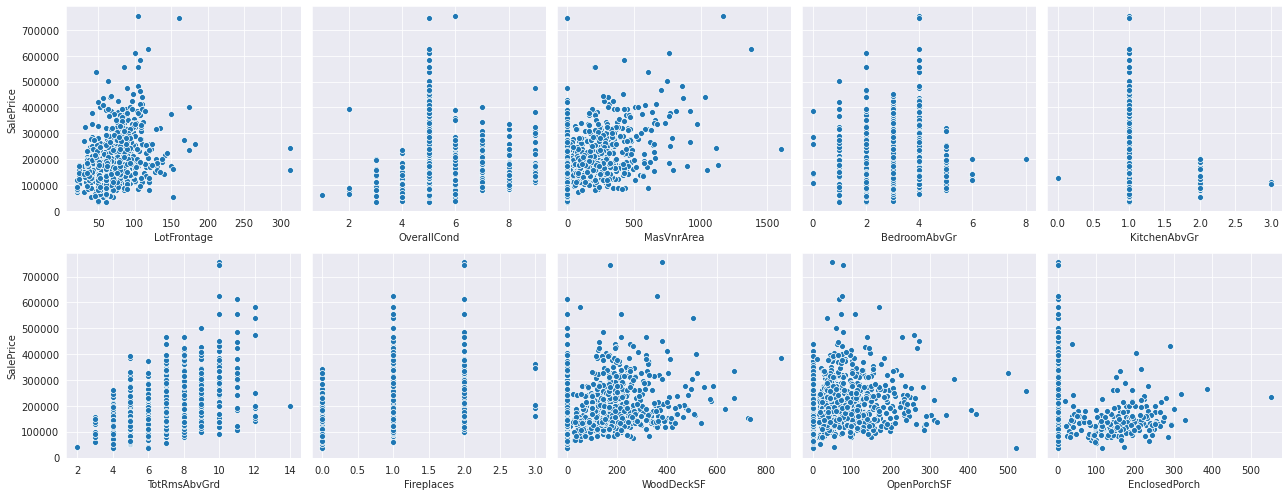

In [29]:
fig, axs = plt.subplots(2, 5, figsize=(18,7), sharey=True)
# Setting bandwidth becaues with given data and bw=0 cannot estimate density
for i, a in enumerate(num_attributes.columns):
    sns.scatterplot(a, 'SalePrice', data=house_prices, ax=axs[i//5][i%5])
plt.tight_layout()

In [30]:
check_missing(num_attributes)

,Nan values,Percentage
LotFrontage,259,0.177397
MasVnrArea,8,0.005479


### --------------
* LotFrontage outliers > 300, Impute with mean 
* MasVnrArea impute with median, create HasVnr=0/1 depending on MasVnrArea>0 (2 of data points with MasVnrArea=0 have MasVnrType!=None, we can assume MasVnrArea=0 => No Vnr), log MasVnrArea > 0
* WoodDeckSF/OpenPorchSF create adequately hasDeck/Porch=0/1 depending on values>0, log values > 0
* <b> Do not Log EnclosedPorch and LotFrontage </b>
* <b>EnclosedPorch outlier > 500, OpenPorchSF outlier >480, WoodDeck outlier > 700</b>
* Including Bedroom/Kitchen AbvGrd, and exclude TotalRoomsAbvGround

## Categorical features

In [31]:
explored_cats = ['KitchenQual', 'ExterQual', 'HeatingQC', 'FireplaceQu', 'BsmtCond', 'PoolQC', 
                 'Alley', 'BldgType', 'MasVnrType', 'ExterCond', 'BsmtFinType2', 'GarageCond', 
                 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

In [32]:
cat_attributes = house_prices.select_dtypes(include='object').drop(explored_cats, axis=1).copy()
cat_attributes

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtExposure,BsmtFinType1,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,PavedDrive
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No,GLQ,GasA,Y,SBrkr,Typ,Attchd,RFn,TA,Y
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Gd,ALQ,GasA,Y,SBrkr,Typ,Attchd,RFn,TA,Y
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Mn,GLQ,GasA,Y,SBrkr,Typ,Attchd,RFn,TA,Y
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,No,ALQ,GasA,Y,SBrkr,Typ,Detchd,Unf,TA,Y
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Av,GLQ,GasA,Y,SBrkr,Typ,Attchd,RFn,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,No,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,TA,Y
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,No,ALQ,GasA,Y,SBrkr,Min1,Attchd,Unf,TA,Y
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,No,GLQ,GasA,Y,SBrkr,Typ,Attchd,RFn,TA,Y
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Mn,GLQ,GasA,Y,FuseA,Typ,Attchd,Unf,TA,Y


In [33]:
check_missing(cat_attributes)

,Nan values,Percentage
GarageFinish,81,0.055479
GarageType,81,0.055479
GarageQual,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtQual,37,0.025342
Electrical,1,0.000685


In [34]:
cat_attributes.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'PavedDrive'],
      dtype='object')

## ------Dropped------

* Alley small influence and lot of NaN
* MasVnrType corr with MasVnrArea
* ExterCond is the same as ExterQual (BsmtQual = height of basement so, BsmtCond != BsmtQual)
* GarageCond = GarageQual
* Fence not big corr
* Other was explored / used already

'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2'... (1-10)

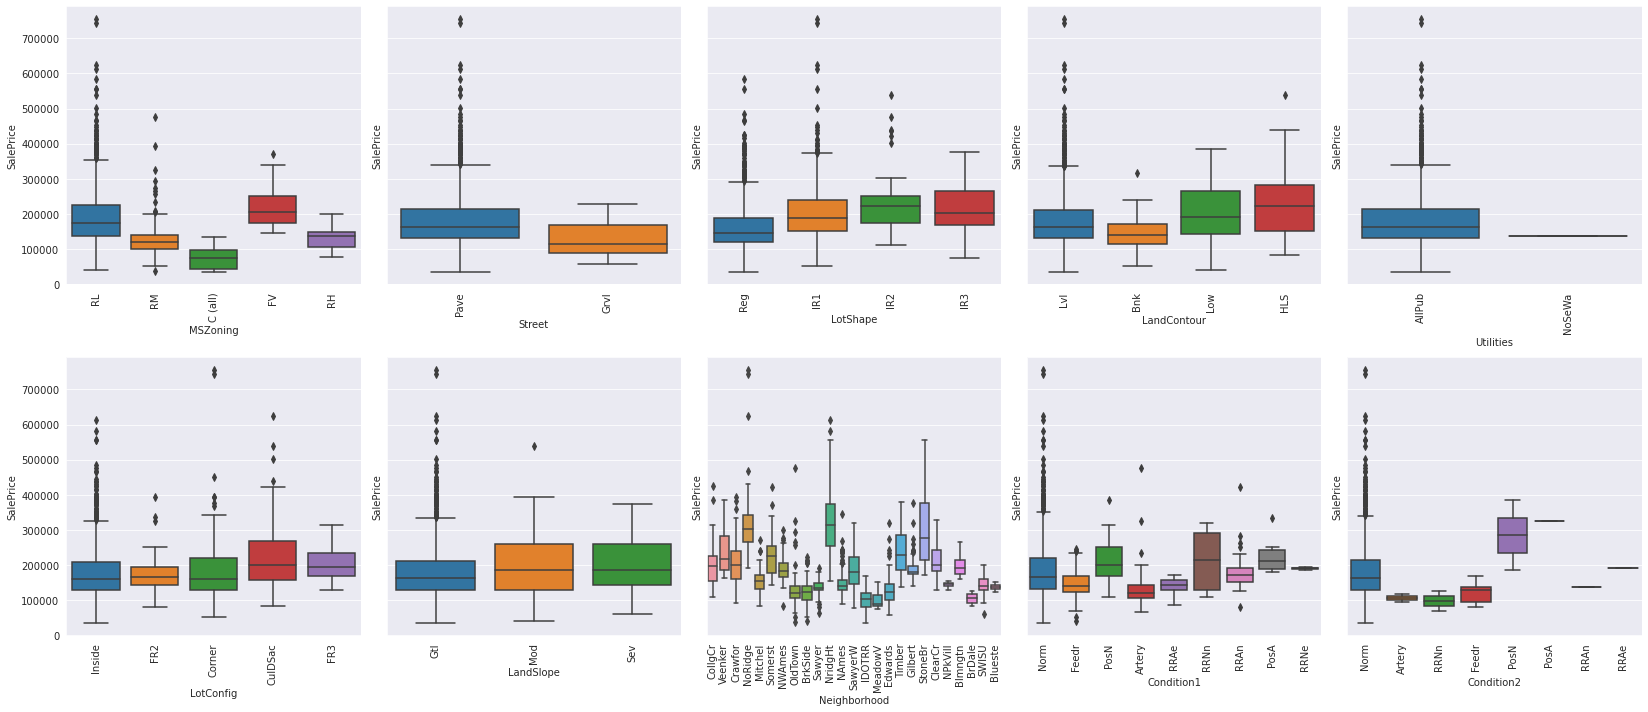

In [35]:
fig, axs = plt.subplots(2, 5, figsize=(23,10), sharey=True)
# Setting bandwidth becaues with given data and bw=0 cannot estimate density
for i, a in enumerate(cat_attributes.columns[:10]):
    sns.boxplot(a, 'SalePrice', data=house_prices, ax=axs[i//5][i%5])
    axs[i//5][i%5].set_xticklabels(axs[i//5][i%5].get_xticklabels(),rotation=90)
plt.tight_layout()

'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating'... (11-20)

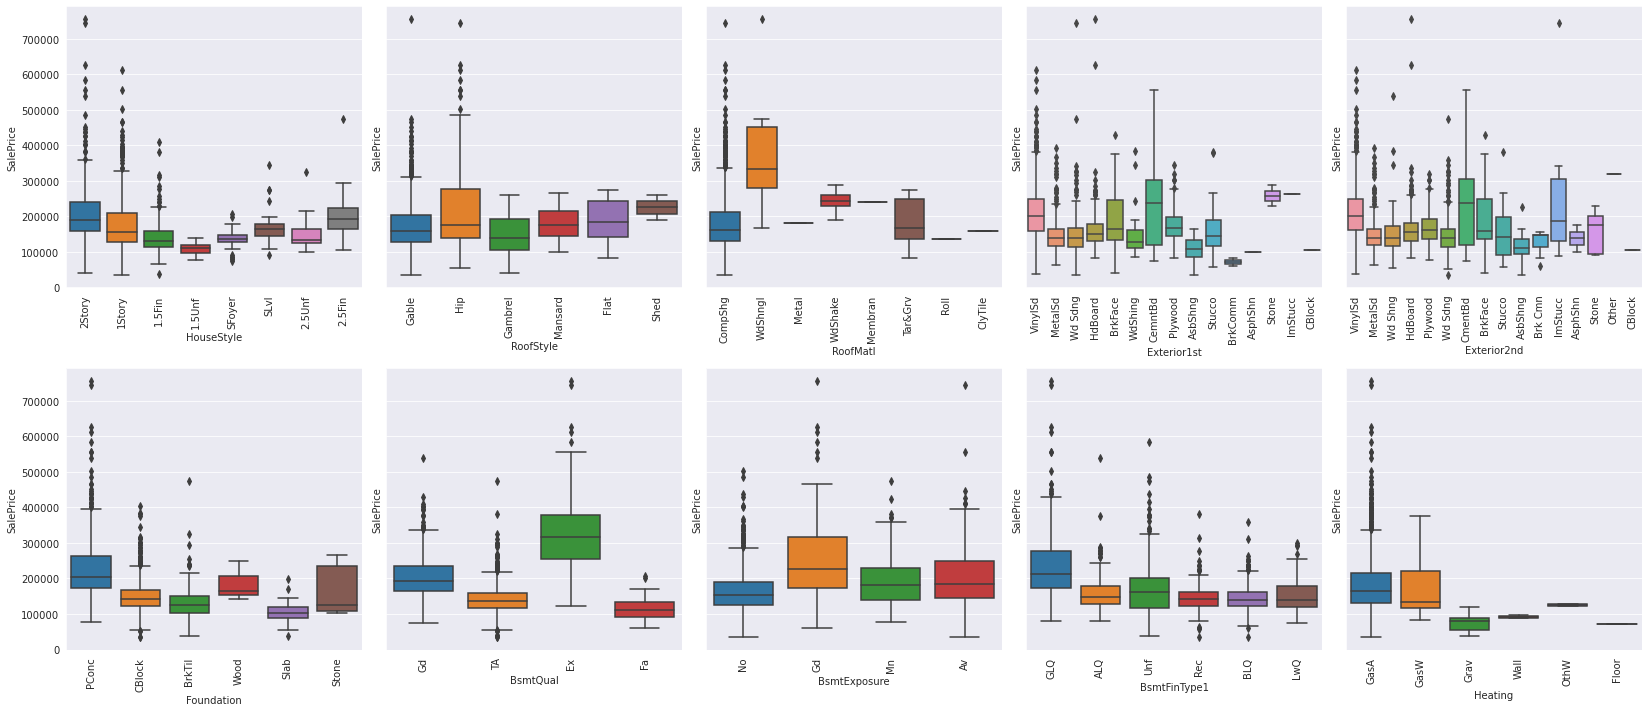

In [36]:
fig, axs = plt.subplots(2, 5, figsize=(23,10), sharey=True)
# Setting bandwidth becaues with given data and bw=0 cannot estimate density
for i, a in enumerate(cat_attributes.columns[10:20]):
    sns.boxplot(a, 'SalePrice', data=house_prices, ax=axs[i//5][i%5])
    axs[i//5][i%5].set_xticklabels(axs[i//5][i%5].get_xticklabels(),rotation=90)
plt.tight_layout()

'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive' (21-27)

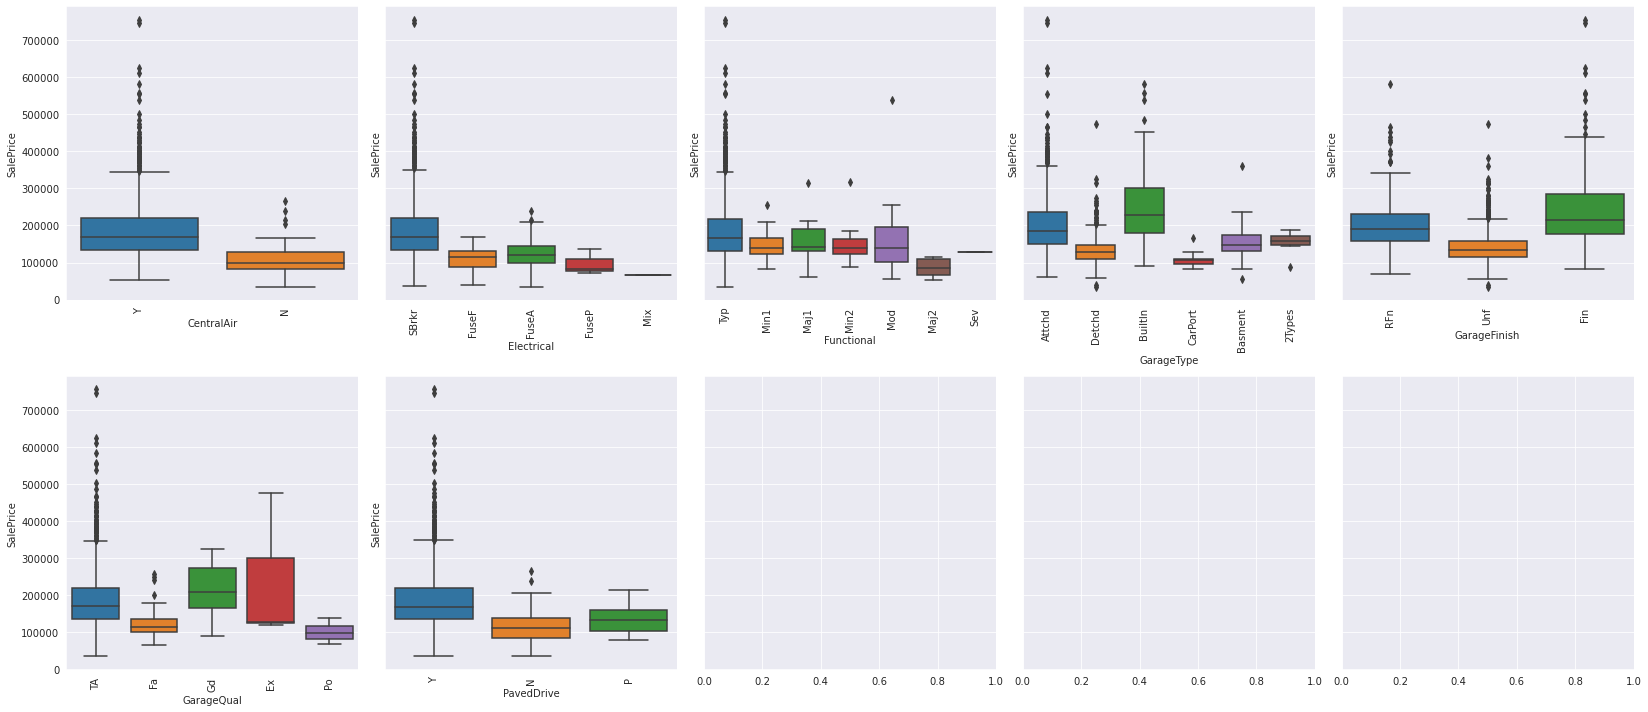

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(23,10), sharey=True)
# Setting bandwidth becaues with given data and bw=0 cannot estimate density
for i, a in enumerate(cat_attributes.columns[20:]):
    sns.boxplot(a, 'SalePrice', data=house_prices, ax=axs[i//5][i%5])
    axs[i//5][i%5].set_xticklabels(axs[i//5][i%5].get_xticklabels(),rotation=90)
plt.tight_layout()

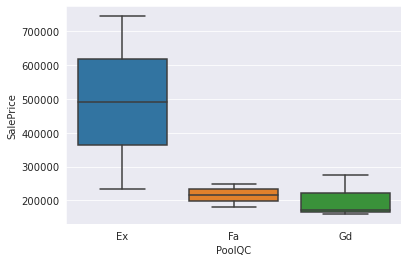

In [38]:
house_prices['PoolQC'].value_counts()
sns.boxplot('PoolQC', 'SalePrice', data=house_prices)

## Consider afte analysis :
* MSZoning (5/8 class)
* Utilities (2/4 class) 
* Neighborhood (25/25 class) check LabelEncoder
* Choose Condition1, drop Condition2
* drop RoofMatl - similar to RoofStyle
* Exterior1st & 2nd >15 cols and missing classes (big cardinality + Label encoder wont work) => drop
* BsmtQual NaN => No basement fill with 'None'
* BsmtExposure NaN => No basement fill with 'None'
* drop BsmtFinType1 - similar to BsmtCond 
* Garagetype NaN => No garage fill with 'None'
* GarageFinish NaN => No garage fill with 'None'
* drop GarageFinish - similar to GarageQual ( GarageQual works better)
* drop LandContour - simiar to LandSlope (which works better)
* drop Neighborhood - not work
* drop LotShape - similar to LotConfig (which works better)
* drop HouseStyle - not work
* drop Heating - some corr with HeatinQC

In [39]:
cols_to_drop = ['Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'GarageFinish', 'Neighborhood', 'LandContour', 'LotShape', 'HouseStyle', 'Heating']
cat_fin_attrs = [c for c in cat_attributes.columns if c not in cols_to_drop]
cat_fin_attrs

['MSZoning',
 'Street',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'RoofStyle',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageQual',
 'PavedDrive']

## Missing Data

In [40]:
house_prices_copy = house_prices.copy()

In [41]:
check_missing(house_prices_copy)

,Nan values,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Filling Na values with None, because in those features NaN means No Pool/Fireplace etc.

In [42]:
cols_NaN_to_None = ['BsmtCond', 'PoolQC', 'FireplaceQu', 'BsmtQual', 'BsmtExposure', 'GarageType', 'GarageQual']

for col_to_fill in cols_NaN_to_None:
    house_prices_copy[col_to_fill] = house_prices_copy[col_to_fill].fillna('None')

In [43]:
check_missing(house_prices_copy)

,Nan values,Percentage
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
MasVnrType,8,0.005479


## Out liars
#### (Before dealing with rest of missing values (mainly numerical-imputing), let get rid off outliers)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Univariate analysis
scaled_price = StandardScaler().fit_transform(house_prices_copy['SalePrice'][:, np.newaxis])
low_range = np.sort(scaled_price.flatten())[:10] # scaled_price[scaled_price.flatten().argsort()][:10]
high_range = np.sort(scaled_price.flatten())[-10:] # scaled_price[scaled_price.flatten().argsort()][-10:]
print("lower, outer range of distribution:", low_range, '\n')
print("higher, outer range of distribution:", high_range)

lower, outer range of distribution: [-1.83870376 -1.83352844 -1.80092766 -1.78329881 -1.77448439 -1.62337999
 -1.61708398 -1.58560389 -1.58560389 -1.5731    ] 

higher, outer range of distribution: [3.82897043 4.04098249 4.49634819 4.71041276 4.73032076 5.06214602
 5.42383959 5.59185509 7.10289909 7.22881942]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


### Bivariate analysis

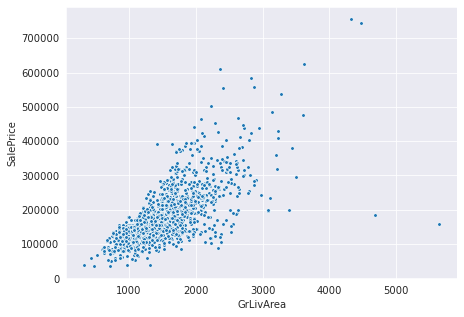

In [46]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot('GrLivArea', 'SalePrice', data=house_prices_copy, s=14, ax=ax)

### Conclusions about numerica features
* in 'GrLivArea' two values over 4k will be considered as outliers that don't follow trend, also two values over 700k SalePrice are those values from outer high range of distribution but they seem to follow the trend (as in TotalBsmtSF)
* (In 'TotalBsmtSF' we have one value over 6k, definitely an outlier, also some values over 3k are not following the trend but I'll try not to delete them) <b>(this point is common with outliers from GrLivArea)<b>

<b> Note:<br> 1. Użyłem default argumentu w funkcji create_scatter i próbując użyć jej do zobaczenia edytowanego df nie aktualizuje mi się def arg <br>2. Analizowanie po kolei outlierów bo skasowałem GrLivArea 2 punkty i okazało się że 1 z nich był wspólnym rekordem z outlierem z TotalBsmtSF, więc oglądać wykresy po każdej edycji <b>

In [47]:
house_prices_copy = house_prices_copy.drop(house_prices_copy[house_prices_copy['GrLivArea']>4500].index)

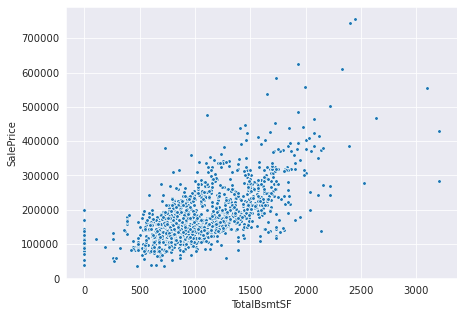

In [48]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot('TotalBsmtSF', 'SalePrice', data=house_prices_copy, s=14, ax=ax)

### Drop values over 70k from LotArea

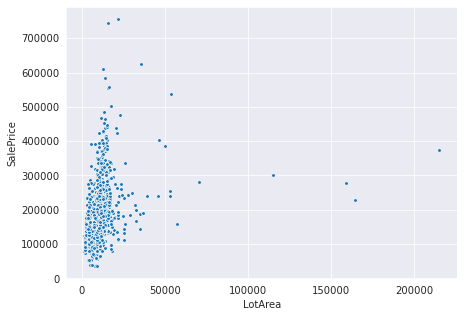

In [49]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot('LotArea', 'SalePrice', data=house_prices_copy, s=14, ax=ax)

In [50]:
house_prices_copy = house_prices_copy.drop(house_prices_copy[house_prices_copy['LotArea'] > 70_000].index)

### Drop outliers discovered in addtional EDA

In [51]:
house_prices_copy = house_prices_copy.drop(house_prices_copy[house_prices_copy['LotFrontage']>300].index)
house_prices_copy = house_prices_copy.drop(house_prices_copy[house_prices_copy['WoodDeckSF']>700].index)
house_prices_copy = house_prices_copy.drop(house_prices_copy[house_prices_copy['OpenPorchSF']>480].index)
house_prices_copy = house_prices_copy.drop(house_prices_copy[house_prices_copy['EnclosedPorch']>500].index)

In [52]:
house_prices_copy.dropna(inplace=True, subset=['Electrical'])

drop_features = list(check_missing(house_prices_copy).index).copy()
# Features not to drop
for el in ('MasVnrArea', 'LotFrontage'):
    drop_features.remove(el)
    
house_prices_copy = house_prices_copy.drop(drop_features, axis=1)

In [53]:
check_missing(house_prices_copy)

,Nan values,Percentage
LotFrontage,256,0.177285
MasVnrArea,8,0.005540


In [54]:
house_prices_copy.shape

(1444, 72)

## Transformations

In [55]:
from scipy.stats import norm

### GrLivArea

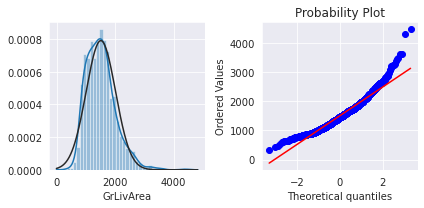

In [56]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy['GrLivArea'], fit=norm, ax=ax1)
stats.probplot(house_prices_copy['GrLivArea'], plot=ax2)
plt.tight_layout()

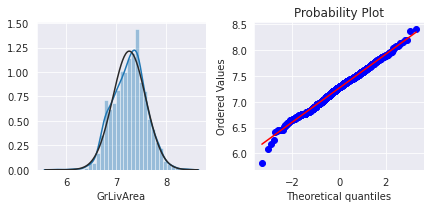

In [57]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy['GrLivArea']), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy['GrLivArea']), plot=ax2)
plt.tight_layout()

### LotArea

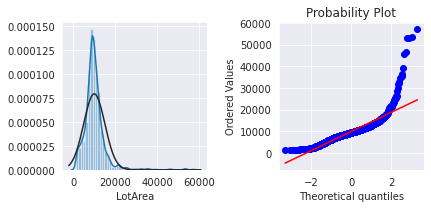

In [58]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy['LotArea'], fit=norm, ax=ax1)
stats.probplot(house_prices_copy['LotArea'], plot=ax2)
plt.tight_layout()

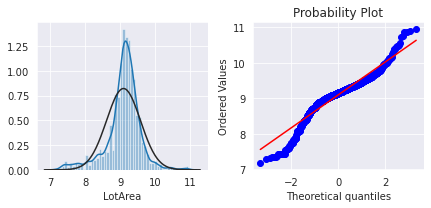

In [59]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy['LotArea']), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy['LotArea']), plot=ax2)
plt.tight_layout()

### TotalBsmtSF

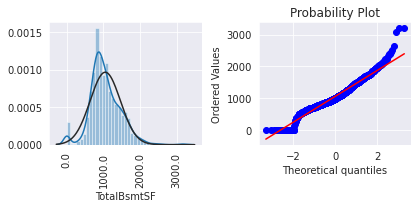

In [60]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy['TotalBsmtSF'], fit=norm, ax=ax1)
stats.probplot(house_prices_copy['TotalBsmtSF'], plot=ax2)
ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
plt.tight_layout()

### LotFrontage (not tranform)

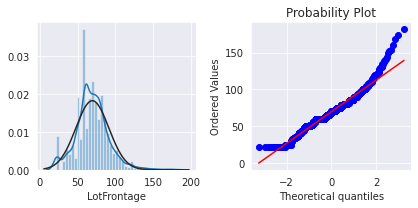

In [61]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy['LotFrontage'].dropna(), fit=norm, ax=ax1)
stats.probplot(house_prices_copy['LotFrontage'].dropna(), plot=ax2)
plt.tight_layout()

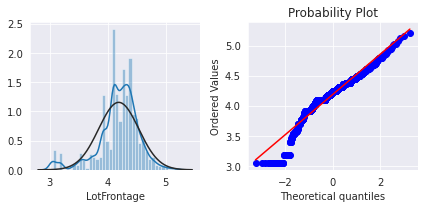

In [62]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy['LotFrontage'].dropna()), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy['LotFrontage'].dropna()), plot=ax2)
plt.tight_layout()

### MasVnrArea

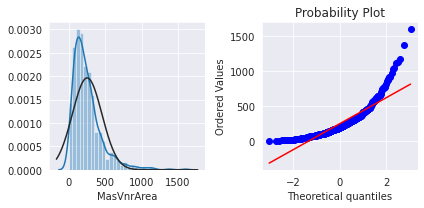

In [63]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy.loc[house_prices_copy['MasVnrArea']>0, 'MasVnrArea'].dropna(), fit=norm, ax=ax1)
stats.probplot(house_prices_copy.loc[house_prices_copy['MasVnrArea']>0, 'MasVnrArea'].dropna(), plot=ax2)
plt.tight_layout()

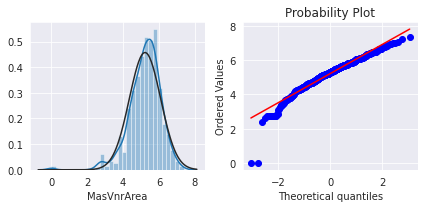

In [64]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy.loc[house_prices_copy['MasVnrArea']>0, 'MasVnrArea'].dropna()), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy.loc[house_prices_copy['MasVnrArea']>0, 'MasVnrArea'].dropna()), plot=ax2)
plt.tight_layout()

### WoodDeckSF

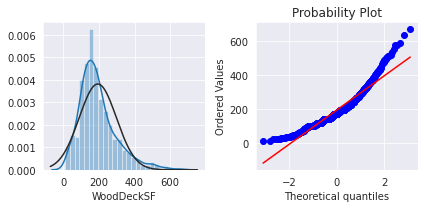

In [65]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy.loc[house_prices_copy['WoodDeckSF']>0, 'WoodDeckSF'].dropna(), fit=norm, ax=ax1)
stats.probplot(house_prices_copy.loc[house_prices_copy['WoodDeckSF']>0, 'WoodDeckSF'].dropna(), plot=ax2)
plt.tight_layout()

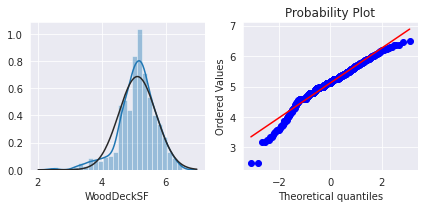

In [66]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy.loc[house_prices_copy['WoodDeckSF']>0, 'WoodDeckSF'].dropna()), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy.loc[house_prices_copy['WoodDeckSF']>0, 'WoodDeckSF'].dropna()), plot=ax2)
plt.tight_layout()

### OpenPorchSF

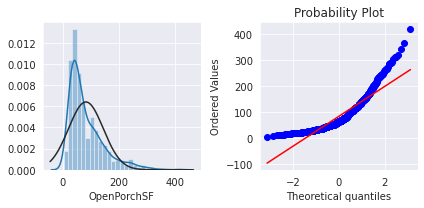

In [67]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy.loc[house_prices_copy['OpenPorchSF']>0, 'OpenPorchSF'].dropna(), fit=norm, ax=ax1)
stats.probplot(house_prices_copy.loc[house_prices_copy['OpenPorchSF']>0, 'OpenPorchSF'].dropna(), plot=ax2)
plt.tight_layout()

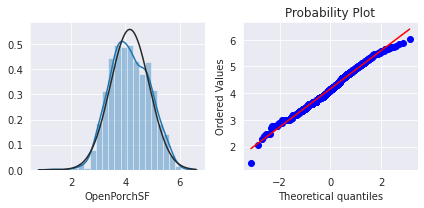

In [68]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy.loc[house_prices_copy['OpenPorchSF']>0, 'OpenPorchSF'].dropna()), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy.loc[house_prices_copy['OpenPorchSF']>0, 'OpenPorchSF'].dropna()), plot=ax2)
plt.tight_layout()

### EnclosedPorch  (not tranform)

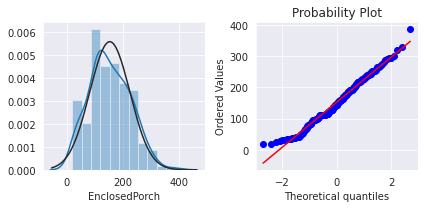

In [69]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(house_prices_copy.loc[house_prices_copy['EnclosedPorch']>0, 'EnclosedPorch'].dropna(), fit=norm, ax=ax1)
stats.probplot(house_prices_copy.loc[house_prices_copy['EnclosedPorch']>0, 'EnclosedPorch'].dropna(), plot=ax2)
plt.tight_layout()

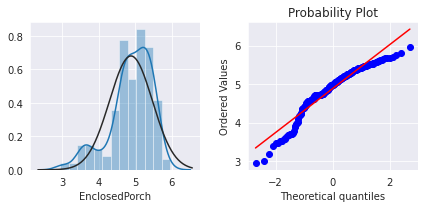

In [70]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
sns.distplot(np.log(house_prices_copy.loc[house_prices_copy['EnclosedPorch']>0, 'EnclosedPorch'].dropna()), fit=norm, ax=ax1)
stats.probplot(np.log(house_prices_copy.loc[house_prices_copy['EnclosedPorch']>0, 'EnclosedPorch'].dropna()), plot=ax2)
plt.tight_layout()

### TotalBsmtSF, MasVnr, LotFrontage, WoodDeckSF, OpenPorchSF, EnclosedPorch also tranform with log, but values of 0 make it impossible.

# Preparing Model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
num_final_feats = ['LotFrontage', 'OverallCond', 'MasVnrArea', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'] # , 'TotRmsAbvGrd'
cat_final_feats = ['FireplaceQu', 'BsmtCond', 'PoolQC'] + cat_fin_attrs

feat_test = features_final + cat_final_feats + num_final_feats
feat_test

['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'ExterQual',
 'HeatingQC',
 'GarageCars',
 'YearBuilt',
 'LotArea',
 'FireplaceQu',
 'BsmtCond',
 'PoolQC',
 'MSZoning',
 'Street',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'RoofStyle',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageQual',
 'PavedDrive',
 'LotFrontage',
 'OverallCond',
 'MasVnrArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch']

In [73]:
feed = house_prices_copy[feat_test].copy()

X = feed.copy()
y = house_prices_copy['SalePrice']
category_feat = ['OverallQual', 'KitchenQual', 'ExterQual', 'HeatingQC'] + cat_final_feats
X

,OverallQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,ExterQual,HeatingQC,GarageCars,YearBuilt,LotArea,...,PavedDrive,LotFrontage,OverallCond,MasVnrArea,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,7,856,1710,2,Gd,Gd,Ex,2,2003,8450,...,Y,65.0,5,196.0,3,1,0,0,61,0
1,6,1262,1262,2,TA,TA,Ex,2,1976,9600,...,Y,80.0,8,0.0,3,1,1,298,0,0
2,7,920,1786,2,Gd,Gd,Ex,2,2001,11250,...,Y,68.0,5,162.0,3,1,1,0,42,0
3,7,756,1717,1,Gd,TA,Gd,3,1915,9550,...,Y,60.0,5,0.0,3,1,1,0,35,272
4,8,1145,2198,2,Gd,Gd,Ex,3,2000,14260,...,Y,84.0,5,350.0,4,1,1,192,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7,1221,1221,2,Gd,Gd,Ex,2,2004,7500,...,Y,62.0,5,0.0,2,1,0,0,113,0
1455,6,953,1647,2,TA,TA,Ex,2,1999,7917,...,Y,62.0,5,0.0,3,1,1,0,40,0
1456,6,1542,2073,2,TA,TA,TA,2,1978,13175,...,Y,85.0,6,119.0,3,1,2,349,0,0
1457,7,1152,2340,2,Gd,Ex,Ex,1,1941,9042,...,Y,66.0,9,0.0,4,1,2,0,60,0


In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.25, random_state=5)
y_train = np.log(y_train)

In [75]:
# Imputation
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer()
med_imputer = SimpleImputer(strategy='median')

X_train['LotFrontage'] = mean_imputer.fit_transform(X_train[['LotFrontage']]).ravel()
X_valid['LotFrontage'] = mean_imputer.transform(X_valid[['LotFrontage']]).ravel()

X_train['MasVnrArea'] = med_imputer.fit_transform(X_train[['MasVnrArea']]).ravel()
X_valid['MasVnrArea'] = med_imputer.transform(X_valid[['MasVnrArea']]).ravel()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [76]:
# Transformations

# Create column indicating of having a basement, deck, porch ... etc. , and transform only other obserevations
# col_hasBsmt = pd.Series(np.zeros(len(house_prices_copy['TotalBsmtSF']), dtype=int), index=house_prices_copy.index) # Index original cuz rows were deleted
# col_hasVnr = pd.Series(np.zeros(len(house_prices_copy['MasVnrArea']), dtype=int), index=house_prices_copy.index)
# col_hasWD = pd.Series(np.zeros(len(house_prices_copy['WoodDeckSF']), dtype=int), index=house_prices_copy.index)
# col_hasOP = pd.Series(np.zeros(len(house_prices_copy['OpenPorchSF']), dtype=int), index=house_prices_copy.index)
# col_hasEP = pd.Series(np.zeros(len(house_prices_copy['EnclosedPorch']), dtype=int), index=house_prices_copy.index)

transform_omit_zero = ['TotalBsmtSF', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF']#, 'EnclosedPorch']

# Creating and adding columns
for col in transform_omit_zero:
    X_train['has'+col] = pd.Series(np.zeros(len(X_train[col]), dtype=int), index=X_train.index)
    X_train.loc[X_train[col] > 0, ('has'+col)] = 1
    

for col in transform_omit_zero:
    X_valid['has'+col] = pd.Series(np.zeros(len(X_valid[col]), dtype=int), index=X_valid.index)
    X_valid.loc[X_valid[col] > 0, ('has'+col)] = 1
    
# # Adding new column
# feed['HasBsmt'] = col_hasBsmt
# feed.loc[feed['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

# Transformations
for col in transform_omit_zero:
    X_train.loc[X_train['has'+col] == 1, col] = np.log(X_train[col])

for col in transform_omit_zero:
    X_valid.loc[X_valid['has'+col] == 1, col] = np.log(X_valid[col])

# Transformations without Has.. (without 0)
X_train['GrLivArea'] = np.log(X_train['GrLivArea']) 
X_train['LotArea'] = np.log(X_train['LotArea'])
#X_train['LotFrontage'] = np.log(X_train['LotFrontage'])

X_valid['GrLivArea'] = np.log(X_valid['GrLivArea']) 
X_valid['LotArea'] = np.log(X_valid['LotArea'])
#X_valid['LotFrontage'] = np.log(X_valid['LotFrontage'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [77]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[category_feat]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[category_feat]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

X_train = pd.concat([X_train.drop(category_feat, axis=1), OH_cols_train], axis=1)
X_valid = pd.concat([X_valid.drop(category_feat, axis=1), OH_cols_valid], axis=1)

In [78]:
mae_scores = []
rmse_scores = []

In [79]:
# Random Forests
rndforest_model = RandomForestRegressor(n_estimators=100, random_state=5)
rndforest_model.fit(X_train, y_train)
preds = rndforest_model.predict(X_valid)

# Adding scores
mae_scores.append(mean_absolute_error(y_valid, np.exp(preds)))
rmse_scores.append(mean_squared_error(np.log(y_valid), np.log(np.exp(preds)), squared=False))

In [80]:
# Ridge regression
ridgecv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 1.5], cv=6)
ridgecv.fit(X_train, y_train)
preds = ridgecv.predict(X_valid)

# Adding scores
mae_scores.append(mean_absolute_error(y_valid, np.exp(preds)))
rmse_scores.append(mean_squared_error(np.log(y_valid), np.log(np.exp(preds)), squared=False))

# Estimated alpha
ridgecv.alpha_

1.5

In [81]:
# Linear regression
lnreg_model = LinearRegression()
lnreg_model.fit(X_train, y_train)
preds = lnreg_model.predict(X_valid)

# Adding scores
mae_scores.append(mean_absolute_error(y_valid, np.exp(preds)))
rmse_scores.append(mean_squared_error(np.log(y_valid), np.log(np.exp(preds)), squared=False))

In [82]:
# Lasso
lassocv = LassoCV(cv=6, alphas=[1e-6, 1e-5, 1e-4, 1e-2, 0.1, 1], tol=1e-2)
lassocv.fit(X_train, y_train)
preds = lassocv.predict(X_valid)

# Adding scores
mae_scores.append(mean_absolute_error(y_valid, np.exp(preds)))
rmse_scores.append(mean_squared_error(np.log(y_valid), np.log(np.exp(preds)), squared=False))

# Estimated alpha
lassocv.alpha_

0.0001

In [83]:
models = ['Rnd Forest', 'Ridge reg', 'Lin reg', 'Lasso']
for i, score in enumerate(zip(mae_scores, rmse_scores)): 
    print(models[i], ':')
    print('\tMAE :', score[0])
    print('\tRMSE :', score[1])

Rnd Forest :
	MAE : 20090.770454218822
	RMSE : 0.1676881121814488
Ridge reg :
	MAE : 16611.25487820176
	RMSE : 0.1358992971428999
Lin reg :
	MAE : 16606.52094532025
	RMSE : 0.13464099190425471
Lasso :
	MAE : 16393.62024652254
	RMSE : 0.13312712014521508


### Submission

In [84]:
# path to file you will use for predictions
test_data_path = '../input/test.csv'

In [85]:
test_data = pd.read_csv(test_data_path)
feed = house_prices_copy[feat_test].copy()

In [86]:
test_NaN_to_None = ['BsmtCond', 'PoolQC', 'FireplaceQu', 'BsmtQual', 'BsmtExposure', 'GarageType', 'GarageQual']

for col_to_fill in test_NaN_to_None:
    test_data[col_to_fill] = test_data[col_to_fill].fillna('None')

In [87]:
check_missing(feed)

,Nan values,Percentage
LotFrontage,256,0.177285
MasVnrArea,8,0.005540


In [88]:
# Impute 
check_missing(test_data[feat_test])

,Nan values,Percentage
LotFrontage,227,0.155586
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Utilities,2,0.001371
Functional,2,0.001371
GarageCars,1,0.000685
KitchenQual,1,0.000685
TotalBsmtSF,1,0.000685


In [89]:
from sklearn.impute import SimpleImputer

frq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer()
med_imputer = SimpleImputer(strategy='median')

# for col in ('GarageCars', 'KitchenQual'):
for col in ('GarageCars', 'KitchenQual', 'Functional', 'Utilities', 'MSZoning'):
    frq_imputer.fit(feed[[col]]) # need 2-D array
    test_data[col] = frq_imputer.transform(test_data[[col]]).ravel()
    
mean_imputer.fit(feed[['TotalBsmtSF']])
test_data['TotalBsmtSF'] = mean_imputer.transform(test_data[['TotalBsmtSF']]).ravel()
    
feed['LotFrontage'] = mean_imputer.fit_transform(feed[['LotFrontage']]).ravel()
test_data['LotFrontage'] = mean_imputer.transform(test_data[['LotFrontage']]).ravel()
    
feed['MasVnrArea'] = med_imputer.fit_transform(feed[['MasVnrArea']]).ravel()
test_data['MasVnrArea'] = med_imputer.transform(test_data[['MasVnrArea']]).ravel()

In [90]:
X_train = feed.copy()
X_test = test_data[feat_test].copy()
y_train = np.log(house_prices_copy['SalePrice'])

In [91]:
transform_omit_zero = ['TotalBsmtSF', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF']

# Creating and adding columns
for col in transform_omit_zero:
    X_train['has'+col] = pd.Series(np.zeros(len(X_train[col]), dtype=int), index=X_train.index)
    X_train.loc[X_train[col] > 0, ('has'+col)] = 1
    

for col in transform_omit_zero:
    X_test['has'+col] = pd.Series(np.zeros(len(X_test[col]), dtype=int), index=X_test.index)
    X_test.loc[X_test[col] > 0, ('has'+col)] = 1

# Transformations
for col in transform_omit_zero:
    X_train.loc[X_train['has'+col] == 1, col] = np.log(X_train[col])

for col in transform_omit_zero:
    X_test.loc[X_test['has'+col] == 1, col] = np.log(X_test[col])

# Transformations without Has.. (without 0)
X_train['GrLivArea'] = np.log(X_train['GrLivArea']) 
X_train['LotArea'] = np.log(X_train['LotArea'])


X_test['GrLivArea'] = np.log(X_test['GrLivArea']) 
X_test['LotArea'] = np.log(X_test['LotArea'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inpu

In [92]:
# Encoding catogories
# category_feat = ['OverallQual', 'KitchenQual', 'ExterQual', 'HeatingQC', 'FireplaceQu', 'BsmtCond']
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[category_feat]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[category_feat]))

OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

X_train = pd.concat([X_train.drop(category_feat, axis=1), OH_cols_train], axis=1)
X_test = pd.concat([X_test.drop(category_feat, axis=1), OH_cols_test], axis=1)

In [93]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=6, alphas=[1e-6, 1e-5, 1e-4, 1e-2, 0.1, 1], tol=1e-2)
lassocv.fit(X_train, y_train)
test_preds = lassocv.predict(X_test)
lassocv.alpha_

0.0001

In [94]:
from sklearn.model_selection import cross_val_score

scores_mae = -1*cross_val_score(lassocv, X_train, np.exp(y_train), cv=5, scoring='neg_mean_absolute_error')
scores_rmse = -1*cross_val_score(lassocv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print('MAE mean score:', scores_mae.mean())
print('RMSE mean score:', scores_rmse.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62501254111.61719, tolerance: 59945402719.26055
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62501109390.40906, tolerance: 59945402719.26055
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62536131758.70563, tolerance: 59945402719.26055
  tol, rng, random, positive)


MAE mean score: 18270.756561219947
RMSE mean score: 0.014129029654122058


In [95]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': np.exp(test_preds)})
output.to_csv('submission.csv', index=False)

# Test Your Work

To test your results, you'll need to join the competition (if you haven't already).  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.

![join competition image](https://i.imgur.com/wLmFtH3.png)

Next, follow the instructions below:
1. Begin by clicking on the blue **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the blue **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the blue **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Continuing Your Progress
There are many ways to improve your model, and **experimenting is a great way to learn at this point.**

The best way to improve your model is to add features.  Look at the list of columns and think about what might affect home prices.  Some features will cause errors because of issues like missing values or non-numeric data types. 

The **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** micro-course will teach you how to handle these types of features. You will also learn to use **xgboost**, a technique giving even better accuracy than Random Forest.


# Other Micro-Courses
The **[Pandas](https://kaggle.com/Learn/Pandas)** micro-course will give you the data manipulation skills to quickly go from conceptual idea to implementation in your data science projects. 

You are also ready for the **[Deep Learning](https://kaggle.com/Learn/Deep-Learning)** micro-course, where you will build models with better-than-human level performance at computer vision tasks.

---
**[Introduction to Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161285) to chat with other Learners.*